__Eithar Elfatih Burie Abdelrahman DS2403__

# Glass Identification Project

__Project Description__

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-

    1.	 Id number: 1 to 214
    2.	 RI: refractive index
    3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    4.	Mg: Magnesium
    5.	Al: Aluminum
    6.	Si: Silicon
    7.	K: Potassium
    8.	Ca: Calcium
    9.	Ba: Barium
    10.	Fe: Iron
    11.	Type of glass: (class attribute)

    •	1- building_windows_float_processed
    •	2- building_windows_non_float_processed
    •	3- vehicle_windows_float_processed
    •	4- vehicle_windows_non_float_processed (none in this database)
    •	5- containers
    •	6- tableware
    •	7- headlamps
    
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


# __Predict : Type of glass__


__________________________

________________________

# 1. Import necessary libraries

In [156]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import imblearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# 2.Importing Data

In [55]:
#read dataset from csv file 
glass_URL='https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv'
df=pd.read_csv(glass_URL)


In [56]:
#create dataframe of csv
glass_df=pd.DataFrame(df)

# create headers list
headers_=['Id number','RI','Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']

#assign headers
glass_df.columns=headers_

#show dataset head 
glass_df.index=glass_df.index+1
glass_df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [57]:
#show dataset head
glass_df.head(10)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1
10,11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.0,0.24,1


In [58]:
#show dataset tail 
glass_df.tail(10)

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
204,205,1.51617,14.95,0.0,2.27,73.30,0.00,8.71,0.67,0.0,7
205,206,1.51732,14.95,0.0,1.80,72.99,0.00,8.61,1.55,0.0,7
206,207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
207,208,1.51831,14.39,0.0,1.82,72.86,1.41,6.47,2.88,0.0,7
208,209,1.51640,14.37,0.0,2.74,72.85,0.00,9.45,0.54,0.0,7
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


# 3. Start EDA

In [59]:
# show shape
glass_df.shape


(213, 11)

In [60]:
glass_df.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


__COMMENT:__ In the problem statement there are 214 observations, however in the tail i can see a difference in index to ID. This means there is a missing observation. 

In [61]:
#show column values 
glass_df.columns.values

array(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'], dtype=object)

__Column breakdown:__

    1.	 Id number: 1 to 214
    2.	 RI: refractive index
    3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    4.	Mg: Magnesium
    5.	Al: Aluminum
    6.	Si: Silicon
    7.	K: Potassium
    8.	Ca: Calcium
    9.	Ba: Barium
    10.	Fe: Iron
    
    11.	Type of glass: (class attribute)



In [62]:
#show info

glass_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 1 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      213 non-null    int64  
 1   RI             213 non-null    float64
 2   Na             213 non-null    float64
 3   Mg             213 non-null    float64
 4   Al             213 non-null    float64
 5   Si             213 non-null    float64
 6   K              213 non-null    float64
 7   Ca             213 non-null    float64
 8   Ba             213 non-null    float64
 9   Fe             213 non-null    float64
 10  Type of glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


__COMMENT:__ 
    There are 11 columns, 2 are int 64 and the rest are float64

In [63]:
#check for null values 
glass_df.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [64]:
#check for duplicates
glass_df.duplicated().value_counts()


False    213
dtype: int64

__COMMENT:__ From the above, we can see there are no null values in the daaset, but there is 1 row missing and there is no data, for one of the seven glass types.

__COMMENT:__
    From the column list, we do not need 'Id number' so i will drop this column 

In [65]:
#drop unnecessary columns
column_to_drop=['Id number']
for col in column_to_drop:
     if col not in glass_df.columns:
        print(f'Column {col} not found in dataframe.')

glass_=glass_df.drop(columns=column_to_drop)
glass_.sample(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
52,1.51808,13.43,2.87,1.19,72.84,0.55,9.03,0.0,0.0,1
201,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.0,0.0,7
16,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.0,0.0,1
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.0,0.0,3
45,1.51900,13.49,3.48,1.35,71.95,0.55,9.00,0.0,0.0,1


In [66]:
column_plot=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass']

__COMMENT:__ Al graphs will be plotted according to this (column)plot

________________________

# 3. EDA (Exploratory Data Analysis)

First, we can look at our target variable (Type of Glass) to see what the variations in type are and how I can move forward in this.

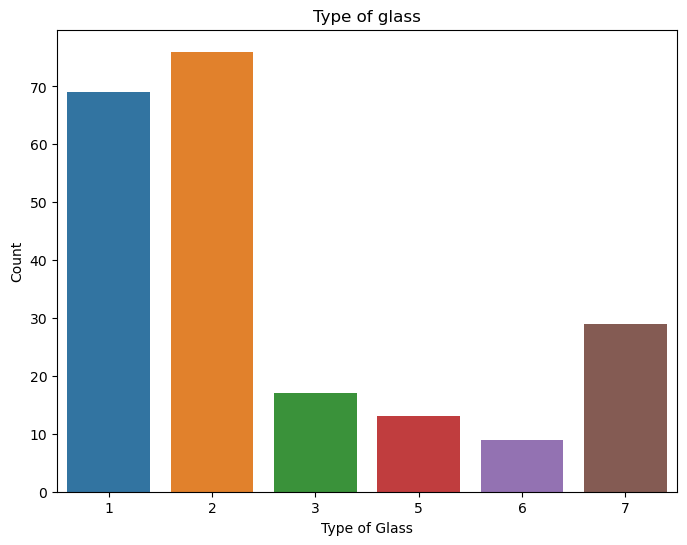

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

In [67]:
#coutn plot of 'Type of glass'
plt.figure(figsize=(8,6))
sns.countplot(x='Type of glass',data=glass_)
plt.xlabel('Type of Glass')
plt.ylabel('Count')
plt.title('Type of glass')


plt.show()

glass_['Type of glass'].value_counts()



    •	1- building_windows_float_processed
    •	2- building_windows_non_float_processed
    •	3- vehicle_windows_float_processed
    •	4- vehicle_windows_non_float_processed (none in this database)
    •	5- containers
    •	6- tableware
    •	7- headlamps

__COMMENT:__ In the above graph, we can see that type 1 and 2 (building_windows_float_processed being the most common while building_windows_non_float_processed comes close second ) are the most common oocurences.3,5 and 6 are much less in comparision and type 4 is non-existant. This is very unbalanced and is something to consider in the way we can use ML after the complete EDA.

In [68]:
glass_.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [69]:
#create list of range of results for easier read 
min_=glass_.min()
max_=glass_.max()
print('The range of each column are :')
for column in glass_.columns:
    print(f'{column}: value range ={max_[column]}, - {min_[column]}')

The range of each column are :
RI: value range =1.53393, - 1.51115
Na: value range =17.38, - 10.73
Mg: value range =3.98, - 0.0
Al: value range =3.5, - 0.29
Si: value range =75.41, - 69.81
K: value range =6.21, - 0.0
Ca: value range =16.19, - 5.43
Ba: value range =3.15, - 0.0
Fe: value range =0.51, - 0.0
Type of glass: value range =7.0, - 1.0


In [70]:
#show mean and standard deviation to compare
glass_d=df.describe().loc[['mean', 'std']]
glass_d

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130


__COMMENTS:__ 

        . All 10 columns are shown as they are all float and integer
        .all coloum counts are equal - there is no missing data
        .there are no negative numbers - data is 
        .mean value is lower tHan std in 'K', 'Ba' and 'Fe', suggesting left-skewness.
        . All scale ranges are very different 
        .
I will now start the visualization to further look at this in detail

________________________

# Data Visualisation

Bivariate Analysis 

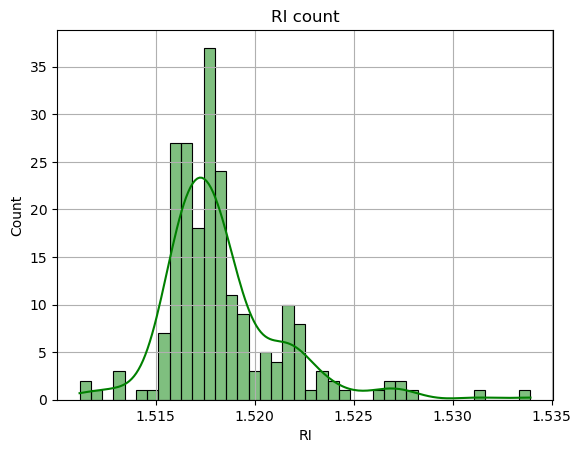

In [71]:
#for RI 

sns.histplot(glass_['RI'], bins=40, kde=True, color='green', alpha=0.5)
plt.title('RI count')
plt.grid(True)
plt.show()



__COMMENT:__

    . skewed to the right
    . some outliers, but has a very small range measure 

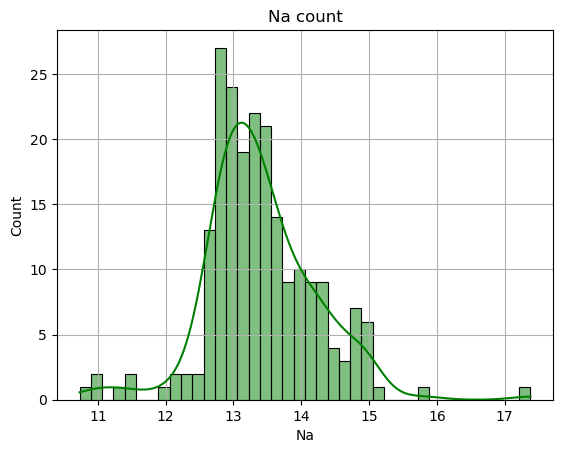

In [72]:
#for Na

sns.histplot(glass_['Na'], bins=40, kde=True, color='green', alpha=0.5)
plt.title('Na count')
plt.grid(True)
plt.show()

__COMMENT:__

        . similar distribution to RI
        . scale much more varied 
        . not too many outliers

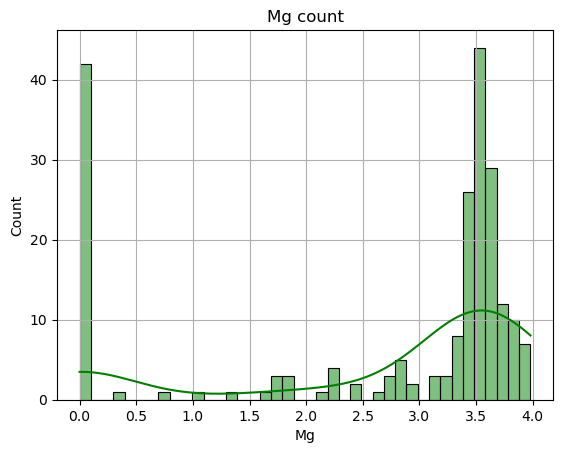

In [73]:
#for Mg

sns.histplot(glass_['Mg'], bins=40, kde=True, color='green', alpha=0.5)
plt.title('Mg count')
plt.grid(True)
plt.show()










__COMMENT:__

       . wide variation of results
       .no correlation 


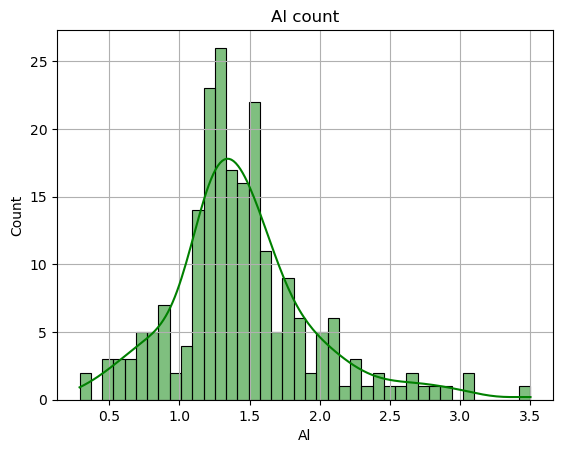

In [74]:
#for Al

sns.histplot(glass_['Al'], bins=40, kde=True, color='green', alpha=0.5)
plt.title('Al count')
plt.grid(True)
plt.show()

__COMMENT:__

    . rather normal distribution 
    . not too many outliers 

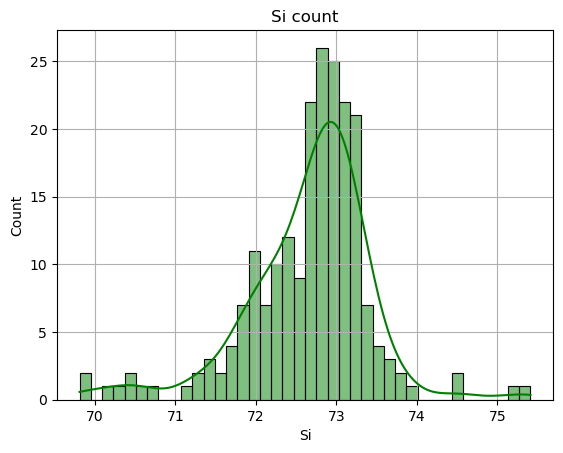

In [75]:
#for Si

sns.histplot(glass_['Si'], bins=40, kde=True, color='green', alpha=0.5)
plt.title('Si count')
plt.grid(True)
plt.show()

__COMMENT:__

    . normal distribution, with left skewness
    .some outliers 

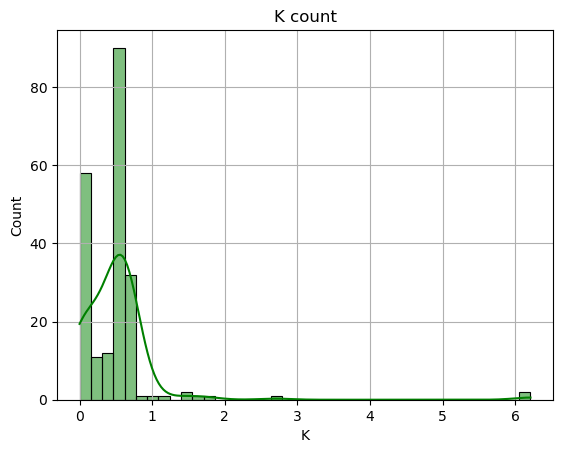

In [76]:
#for age K

sns.histplot(glass_['K'], bins=40, kde=True, color='green', alpha=0.5)
plt.title('K count')
plt.grid(True)
plt.show()

__COMMENT:__

    .very high skewness to the right 
    .outliers seem to change the graph

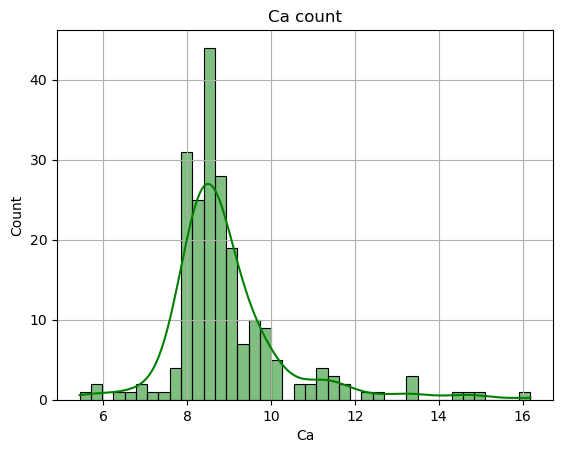

In [77]:
#for Ca

sns.histplot(glass_['Ca'], bins=40, kde=True, color='green', alpha=0.5)
plt.title('Ca count')
plt.grid(True)
plt.show()

__COMMENT:__

    . rather normal distribution
    . does have outliers 

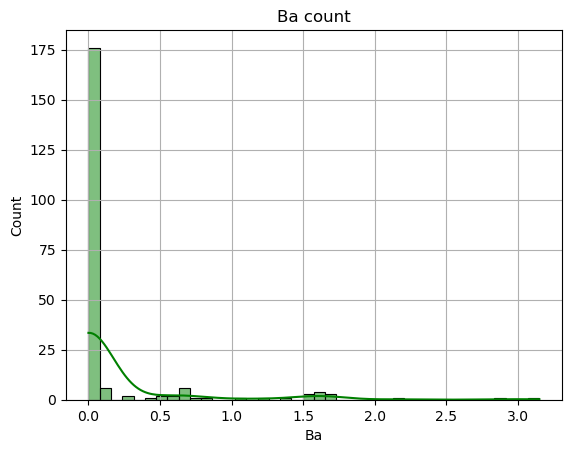

In [78]:
#for Ba

sns.histplot(glass_['Ba'], bins=40, kde=True, color='green', alpha=0.5)
plt.title('Ba count')
plt.grid(True)
plt.show()

__COMMENT:__

    .majority of the results in a concentrated range
    . many outliers 
    . highly skewed to the right

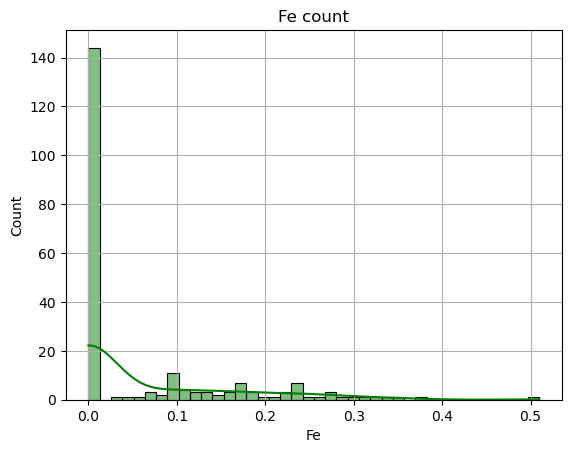

In [79]:
#for Fe

sns.histplot(glass_['Fe'], bins=40, kde=True, color='green', alpha=0.5)
plt.title('Fe count')
plt.grid(True)
plt.show()

__COMMENT:__

    . Very similar to Ba graph 
    . Many outliers 
    

In [80]:
#check skewness
skewness=glass_.skew()
sorted_=skewness.sort_values()
sorted_


Mg              -1.154323
Si              -0.744546
Na               0.457318
Al               0.900017
Type of glass    1.108861
RI               1.639658
Fe               1.747173
Ca               2.040591
Ba               3.406749
K                6.549276
dtype: float64

In [81]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_skewness.index, sorted_skewness.values)
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.title('Skewness of Each Column')
plt.xticks(rotation=45)
plt.show()

NameError: name 'sorted_skewness' is not defined

<Figure size 1000x600 with 0 Axes>

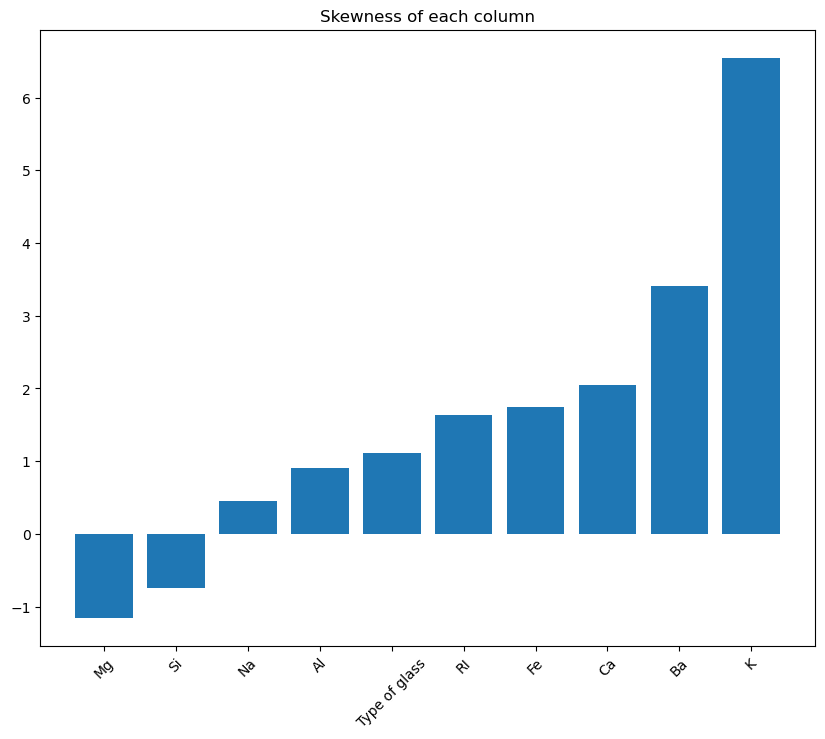

In [82]:
plt.figure(figsize=(10,8))
plt.bar(sorted_.index, sorted_.values)
plt.title('Skewness of each column')
plt.xticks(rotation=45)
plt.show()

__OVERALL OBSERVATIONS:__ 

    .There seems to be no normal distribtion in any of the features 
    .K, Ba, Ca and Fe are highly postively skewed
    .Mg is unique 
    .Mg and Si are negatively skewed
    .K, BA and Fe have many outliers
 

__Identify outliers__

box_plots

In [83]:
glass_

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [84]:
column_plot

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']

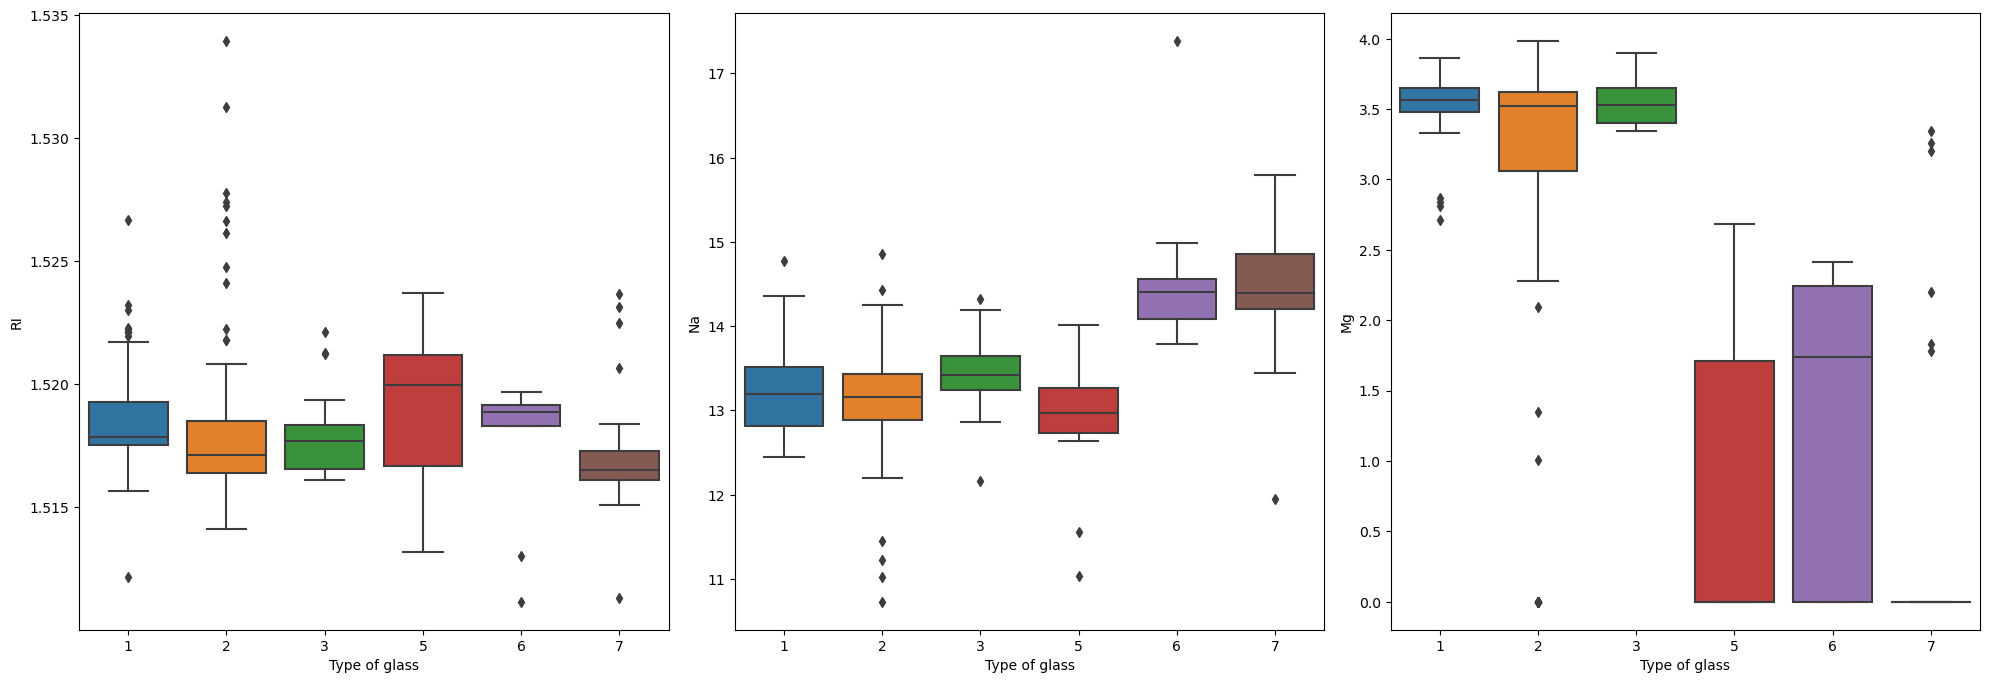

In [85]:

plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='Type of glass', y='RI', data=glass_)

plt.subplot(3,3,2)
sns.boxplot(x='Type of glass', y='Na', data=glass_)

plt.subplot(3,3,3)
sns.boxplot(x='Type of glass', y='Mg', data=glass_)

plt.tight_layout()

__COMMENTS:__

__RI__

    . Type to has a high number of outliers
    . Type 1 and 2 have similar boxs shapes and type 5 has the highest quartile ranges 

__Na__

    . All types have similar graphs and seem to have a similiar range of results even though the scale of measure is high 
    . outliers are visibile, again type 2 has the most 
    
__Mg__
    
    . Type 1 , 2, and 3 have similiar results and are concentrated on the higher end of the Mg count
    .5,6 and 7 are much lower which could indicate the type of glass required
    .again there are quite afew outliers and type 2 again has the most visible range but not the highest amount 

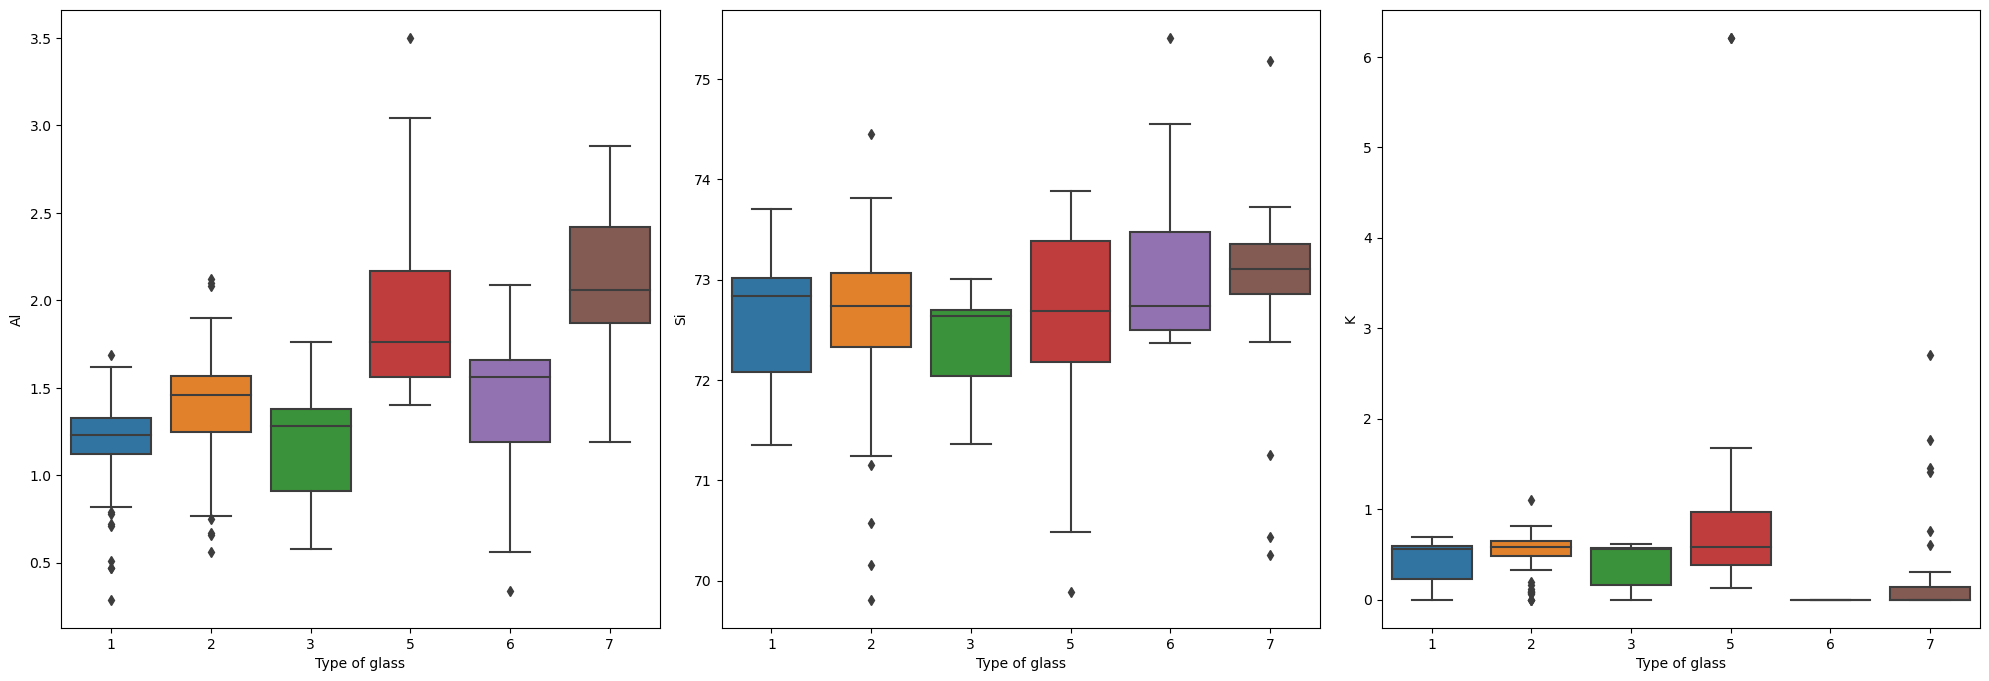

In [86]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(x='Type of glass', y='Al', data=glass_)

plt.subplot(3,3,2)
sns.boxplot(x='Type of glass', y='Si', data=glass_)

plt.subplot(3,3,3)
sns.boxplot(x='Type of glass', y='K', data=glass_)

plt.tight_layout()




__COMMENT:__

__Al__

    .the types of glass seem to have a balanced result in all types
    .outliers are most visible in typ 1 and 2
    .

__Si__

    .the graph is similar to Al, but has an even more balanced result between QR 75 and QR 25 
    . there are a higher nmber of outliers und QR 25 
    
__K__

    . outliers skew the results highly 
    . majority of results are in a range o  to 1
    .all glass type are similar 

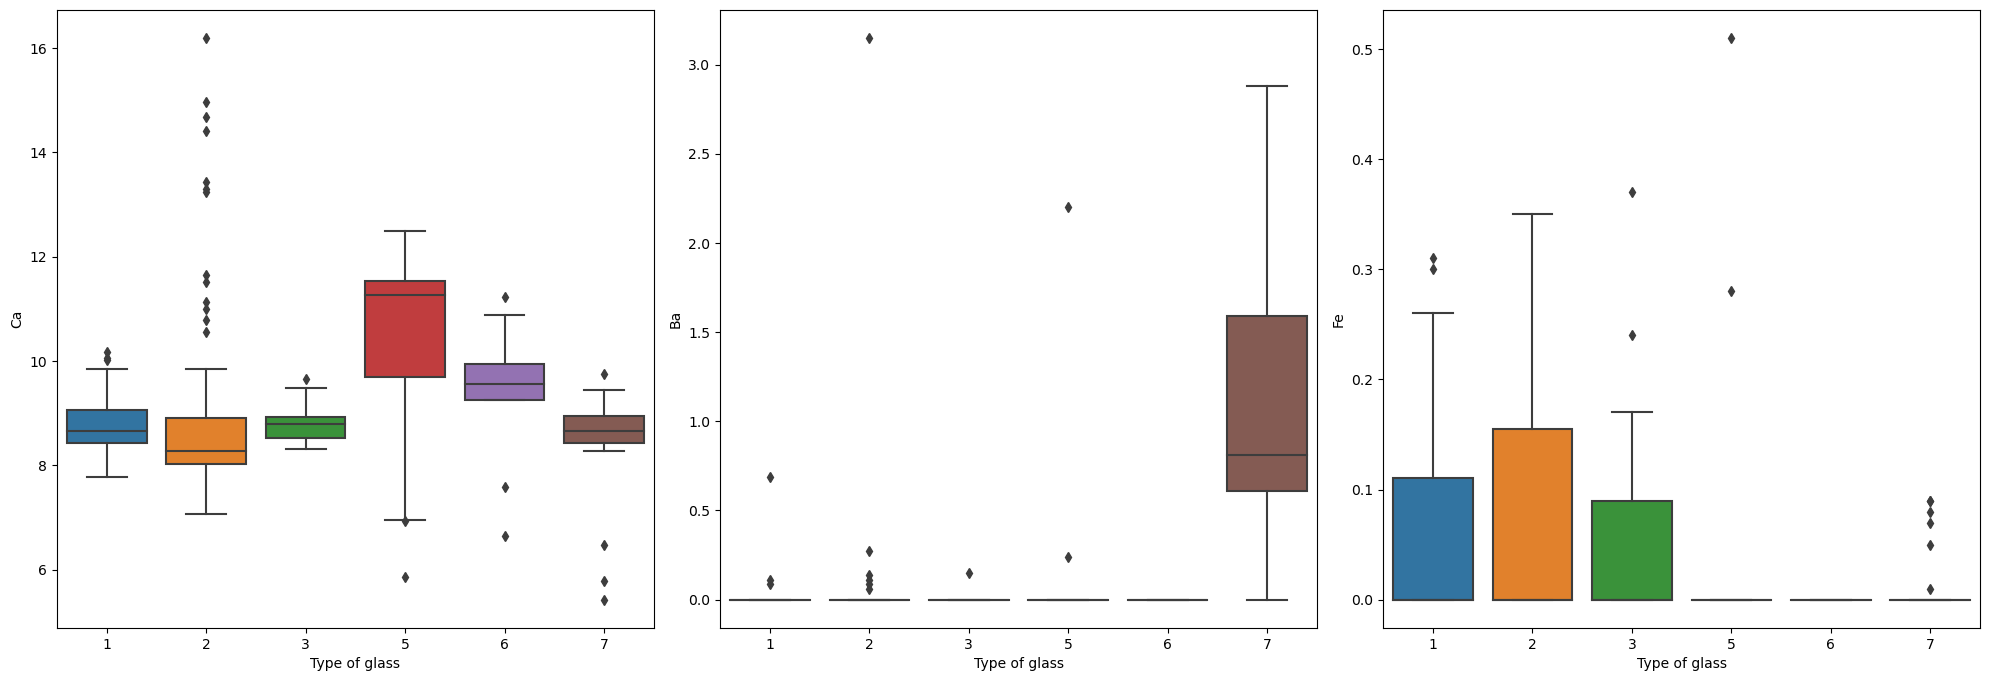

In [87]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(x='Type of glass', y='Ca', data=glass_)

plt.subplot(3,3,2)
sns.boxplot(x='Type of glass', y='Ba', data=glass_)

plt.subplot(3,3,3)
sns.boxplot(x='Type of glass', y='Fe', data=glass_)

plt.tight_layout()


__COMMENT:__

__Ca__
    . all glass types are in a range from 5-1, except 5
    . type 2 has the most outliers 


__Ba__

    .type 7 clearly has a different range of results
    .outliers have affected the results
    .type 1-6 (excluding type 4) are very similiar 
    
__Fe__

    .type 1 2 and 3 are very similar 
    .tpye 5,6 and 7 are also alike
    . tpye seven has the highest amount of outliers 

__OVERALL OBSERVATION__

    .type 2, in the majority of boxplots has the most outliers 
    . type 1,2 and 3 have the most similar results in each plot
    . type 5 has the most unique results on each graph

____________________

# Multivariate Analysis

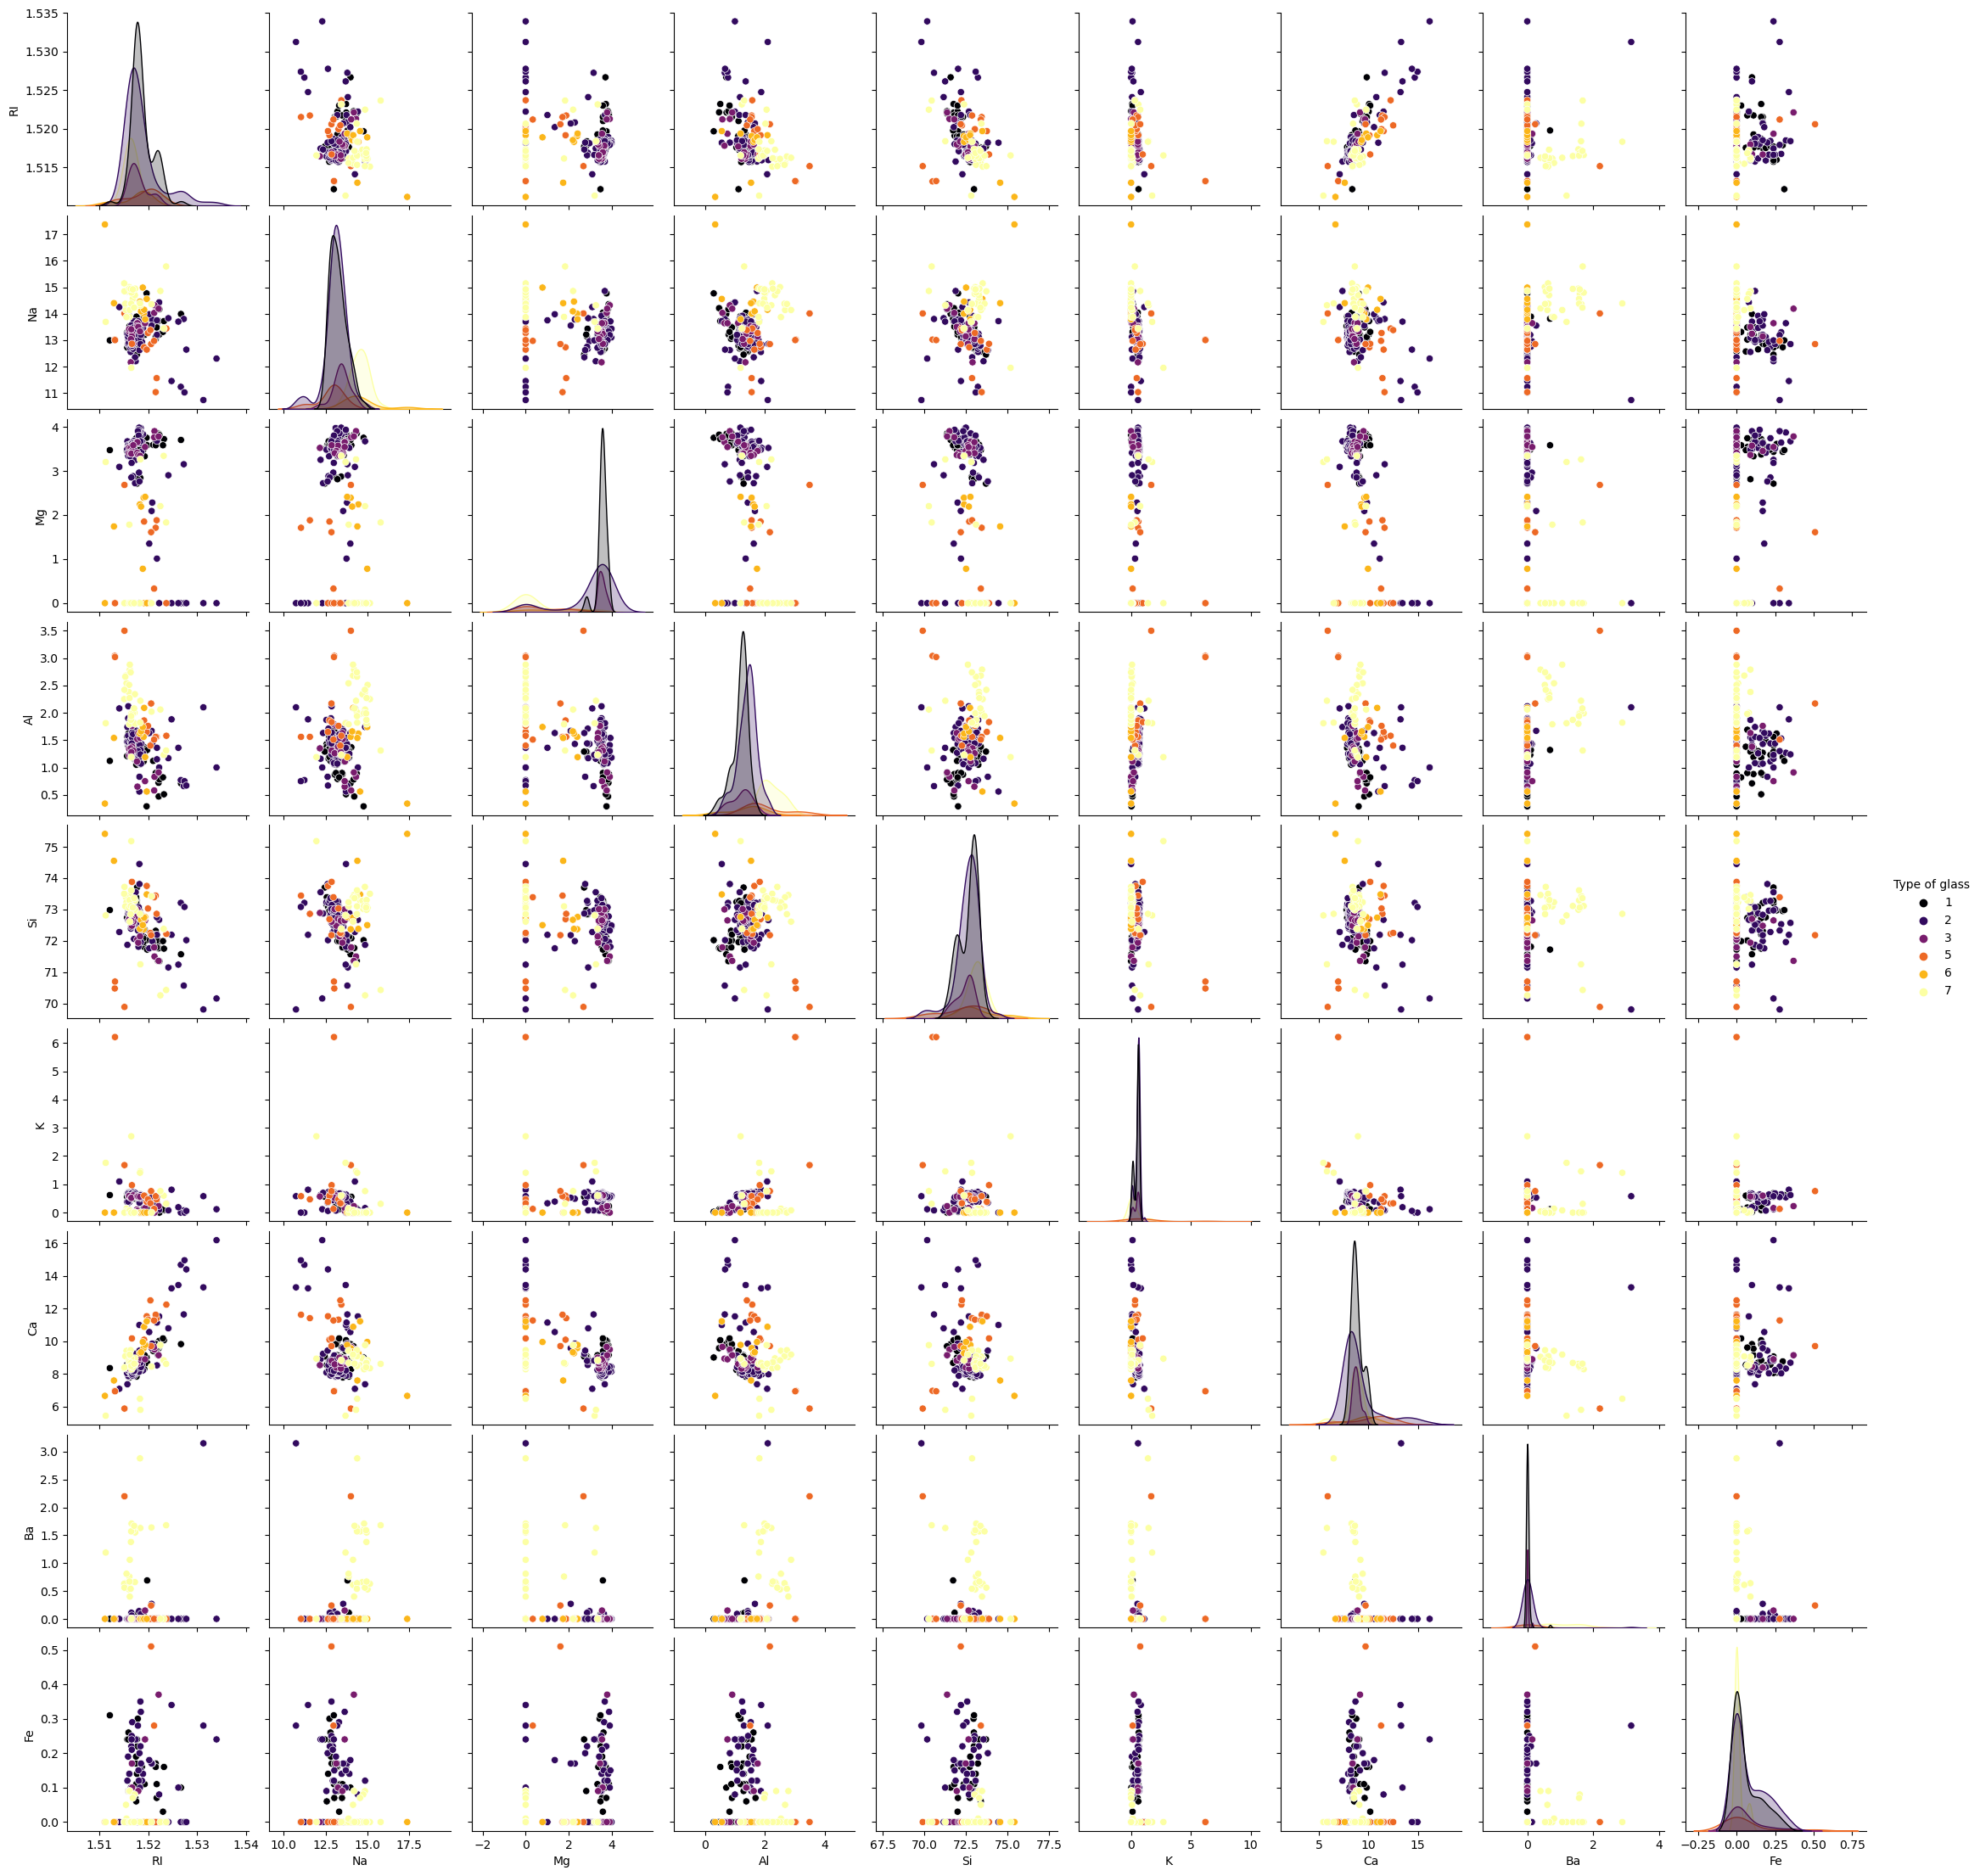

In [88]:
sns.pairplot(glass_,hue='Type of glass', palette='inferno')
plt.show()

In [93]:
#remove outliers 

#calculate IQR
column_plot
Q1=glass_[column_plot].quantile(0.25)
Q3=glass_[column_plot].quantile(0.75)
IQR= Q3 - Q1

#determin outliers 
low_b= Q1 - 1.5 * IQR
upp_b= Q3 + 1.5 * IQR

#show outliers 
outliers_=glass_[((glass_[column_plot] < low_b) | (glass_[column_plot] > upp_b)).any(axis=1)]
                  
#remove otliers
glass_1=glass_[~((glass_[column_plot] < low_b) | (glass_[column_plot] > upp_b)).any(axis=1)]

print('Data frame after removing outliers')
print(glass_1)
                 
print('\nOutliers removed')
print(outliers_)

Data frame after removing outliers
          RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type of glass
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0              1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0              1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0              1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0              1
6    1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.0              1
..       ...    ...   ...   ...    ...   ...   ...  ...  ...            ...
176  1.51905  14.00  2.39  1.56  72.37  0.00  9.57  0.0  0.0              6
177  1.51937  13.79  2.41  1.19  72.76  0.00  9.77  0.0  0.0              6
178  1.51829  14.46  2.24  1.62  72.38  0.00  9.26  0.0  0.0              6
179  1.51852  14.09  2.19  1.66  72.67  0.00  9.32  0.0  0.0              6
181  1.51888  14.99  0.78  1.74  72.50  0.00  9.95  0.0  0.0              6

[135 rows x 10 columns]

Outliers removed
          

In [94]:
#check skewnesss
glass_1.skew()

RI               1.083772
Na               0.860978
Mg              -3.554433
Al              -0.115815
Si              -0.486239
K               -1.047677
Ca               0.810320
Ba               0.000000
Fe               1.383949
Type of glass    2.115491
dtype: float64

<Axes: >

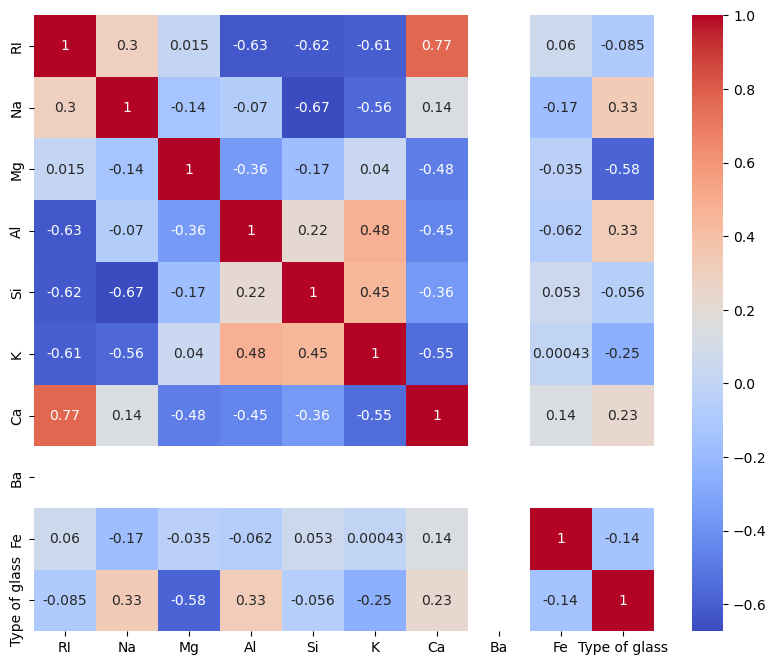

In [95]:
corr_1=glass_1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_1,annot=True,cmap='coolwarm')


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'RI'),
  Text(1.5, 0, 'Na'),
  Text(2.5, 0, 'Mg'),
  Text(3.5, 0, 'Al'),
  Text(4.5, 0, 'Si'),
  Text(5.5, 0, 'K'),
  Text(6.5, 0, 'Ca'),
  Text(7.5, 0, 'Ba'),
  Text(8.5, 0, 'Fe'),
  Text(9.5, 0, 'Type of glass')])

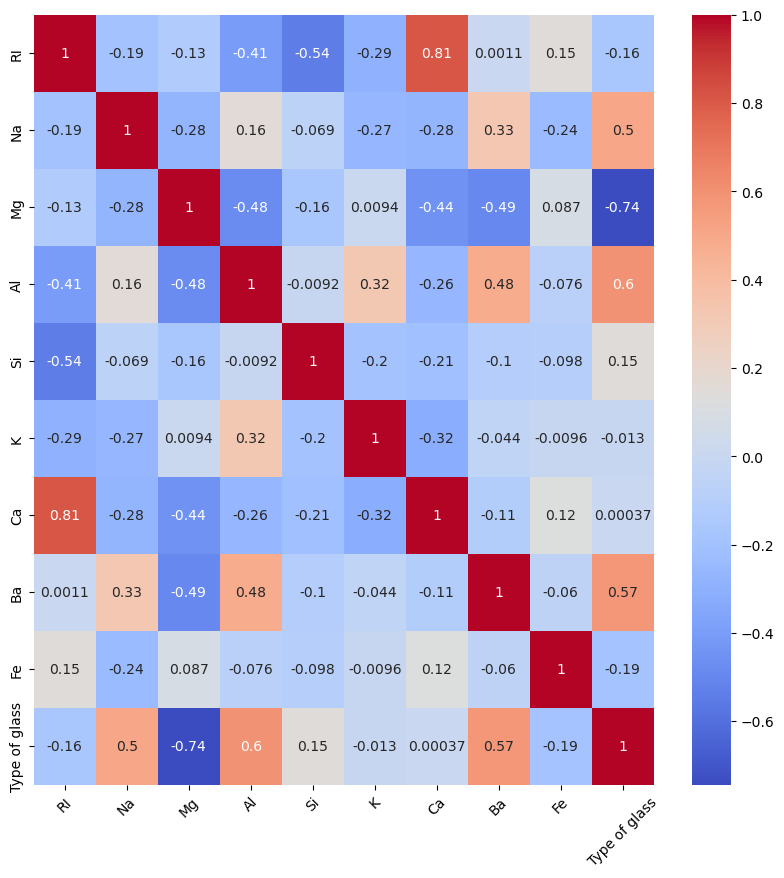

In [96]:
#correlation matrix
corr_= glass_.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_,annot=True, cmap='coolwarm')
plt.xticks(rotation=45)


__COMMENT:__ 

    

In [114]:
#SPLITTING FEATURES
X=glass_1.drop(['Type of glass'], axis=1) # remove type of glass column
Y=(glass_1['Type of glass']>=5).astype(int)
print(Y)

print('Feature dimensions:', X.shape)
print('Label dimensions:', Y.shape)


1      0
2      0
3      0
4      0
6      0
      ..
176    1
177    1
178    1
179    1
181    1
Name: Type of glass, Length: 135, dtype: int32
Feature dimensions: (135, 9)
Label dimensions: (135,)


In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [136]:
scaler=StandardScaler()

X_train_st=scaler.fit_transform(X_train)
X_test_st=scaler.transform(X_test)


as data is very imbalance . i will use the SMOTE techniquwe to sort thi s


# SMOTE

In [137]:
from imblearn.over_sampling import SMOTE

In [167]:
smote_=SMOTE(k_neighbors=1, random_state=42) 
      
X_resample,Y_resample=smote_.fit_resample(X_train,Y_train)

In [ ]:
#RandomForestClassifier

In [148]:
model=RandomForestClassifier(random_state=42)
model.fit(X_resample,Y_resample)

Y_pred=model.predict(X_test_st)

print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Classification report:\n', classification_report(Y_test,Y_pred))
print('Confusion Matrix: \n', confusion_matrix(Y_test,Y_pred))

Accuracy: 0.7804878048780488
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88        40
           1       0.00      0.00      0.00         1

    accuracy                           0.78        41
   macro avg       0.48      0.40      0.44        41
weighted avg       0.95      0.78      0.86        41

Confusion Matrix: 
 [[32  8]
 [ 1  0]]


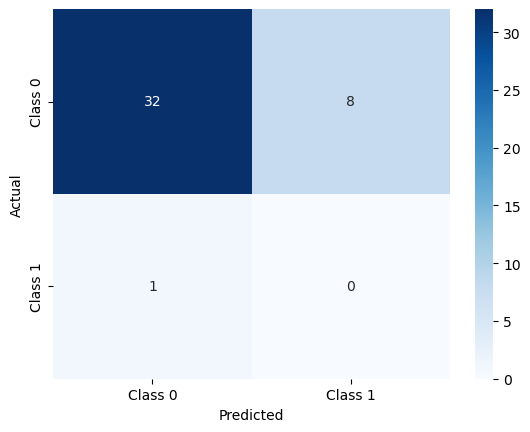

In [152]:
#plot
con_mat_RFC=confusion_matrix(Y_test, Y_pred)
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [153]:
#logistic regression

In [161]:
log_R=LogisticRegression(random_state=42)

log_R.fit(X_train_st,Y_train)

LogisticRegression(random_state=42)

In [164]:
#make predictions 
log_R_Y_pred=log_R.predict(X_test_st)
#calculate
accuracy_log_R=log_R.predict(X_test_st)
print('Logistic Regrssion Accuracy:', accuracy_log_R)

#classification report 
print('Logistic Regrsssion Classification report:\n', classification_report(Y_test, log_R_Y_pred))

print('Logisitic Regresiion Confusion Matrix:/n', confusion_matrix,(Y_test, log_R_Y_pred))

Logistic Regrssion Accuracy: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
Logistic Regrsssion Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       0.00      0.00      0.00         1

    accuracy                           0.98        41
   macro avg       0.49      0.50      0.49        41
weighted avg       0.95      0.98      0.96        41

Logisitic Regresiion Confusion Matrix:/n <function confusion_matrix at 0x0000021C12454900> (124    0
80     0
134    0
22     0
52     0
75     0
14     0
140    0
158    0
164    1
54     0
49     0
30     0
126    0
152    0
35     0
63     0
6      0
97     0
94     0
98     0
29     0
18     0
20     0
12     0
143    0
55     0
13     0
156    0
93     0
133    0
96     0
43     0
1      0
81     0
68     0
27     0
146    0
151    0
67     0
17     0
Name: Type of glass, dtype: int32, array([0, 0, 0, 0, 

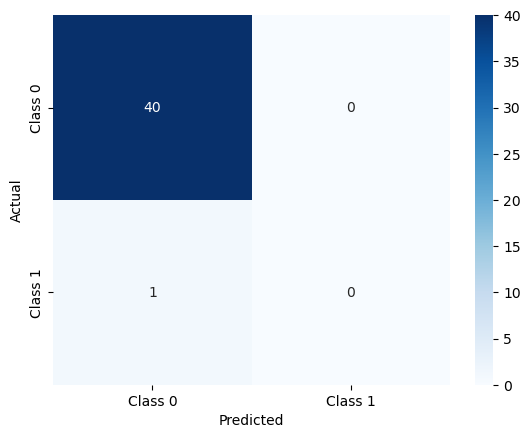

In [166]:
con_mat_log_R=confusion_matrix(Y_test, log_R_Y_pred)
sns.heatmap(con_mat_log_R, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()